<a href="https://colab.research.google.com/github/ivn-srg/data-analysis-course-omsu/blob/main/%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5%208/%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80_8_%D0%9C%D0%BD%D0%BE%D0%B3%D0%BE%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%BE%D0%B2%D0%B0%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, LabelEncoder)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import (classification_report, confusion_matrix,
                             ConfusionMatrixDisplay, roc_curve, auc, accuracy_score)
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


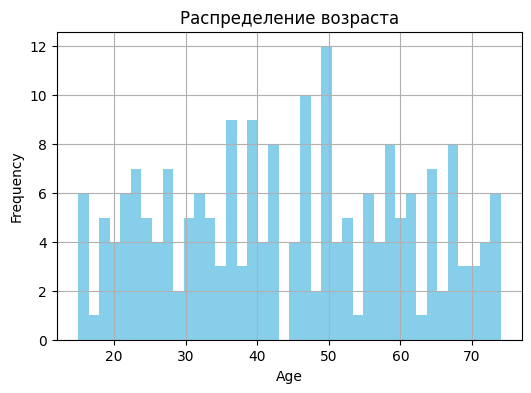

In [ ]:
# 4. Визуализация распределений
plt.figure(figsize=(6,4))
df['Age'].hist(bins=40, color='skyblue')
plt.title("Распределение возраста")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

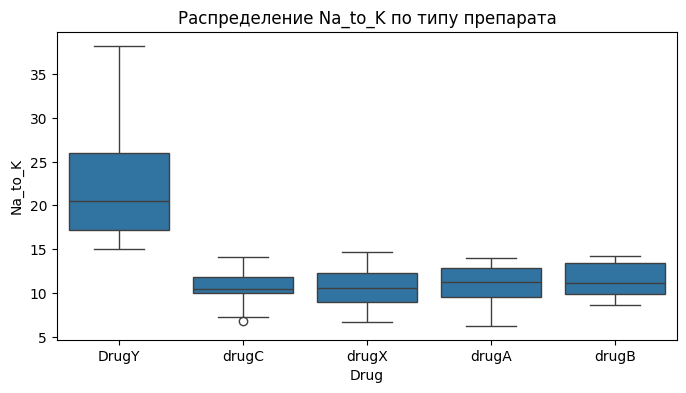

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Drug', y='Na_to_K', data=df)
plt.title("Распределение Na_to_K по типу препарата")
plt.show()

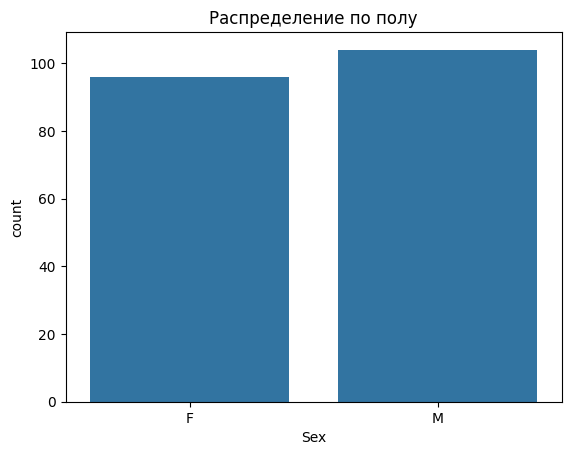

In [ ]:
sns.countplot(x='Sex', data=df)
plt.title("Распределение по полу")
plt.show()

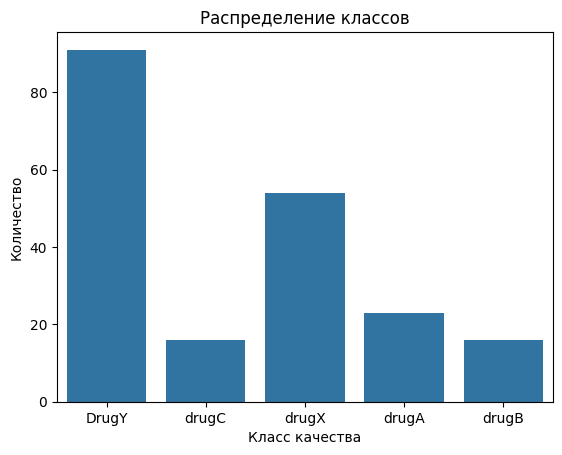

In [ ]:
sns.countplot(x='Drug', data=df)
plt.title('Распределение классов')
plt.xlabel('Класс качества')
plt.ylabel('Количество')
plt.show()

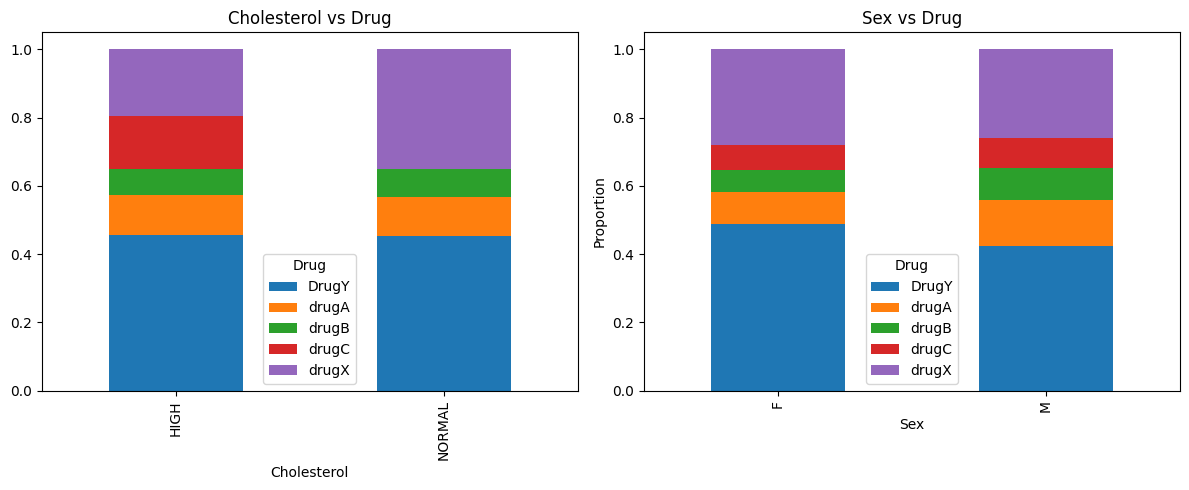

In [ ]:
# анализируйте зависимость между уровнем артериального давления (BP) и назначенным лекарством (Drug).
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

pd.crosstab(df['Cholesterol'], df['Drug'], normalize='index').plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title("Cholesterol vs Drug")
plt.ylabel("Proportion")

pd.crosstab(df['Sex'], df['Drug'], normalize='index').plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title("Sex vs Drug")
plt.ylabel("Proportion")

plt.tight_layout()
plt.show()

In [ ]:
df.select_dtypes('object').columns

Index(['Sex', 'BP', 'Cholesterol', 'Drug'], dtype='object')

In [ ]:
enc = LabelEncoder()

features_cat = ['Sex', 'BP', 'Cholesterol', 'Drug']

for col in features_cat:
  df[col] = enc.fit_transform(df[col])

X = df.drop('Drug', axis=1)
y = df['Drug']

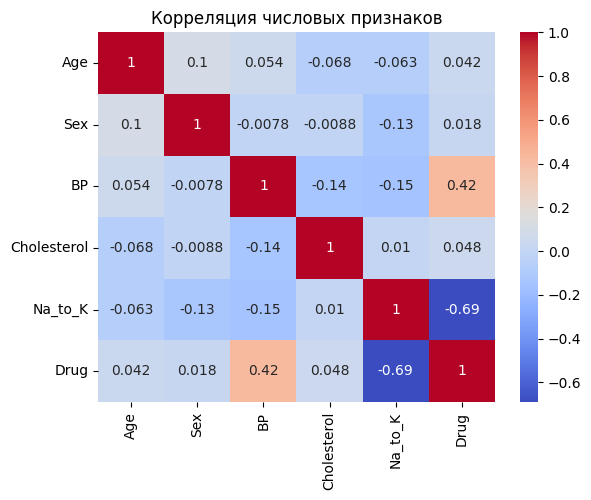

In [ ]:
# Корреляция для числовых признаков
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Корреляция числовых признаков")
plt.show()

In [ ]:
# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.86      1.00      0.92         6
           2       1.00      1.00      1.00         3
           3       1.00      0.80      0.89         5
           4       1.00      0.91      0.95        11

    accuracy                           0.93        40
   macro avg       0.95      0.93      0.93        40
weighted avg       0.93      0.93      0.93        40



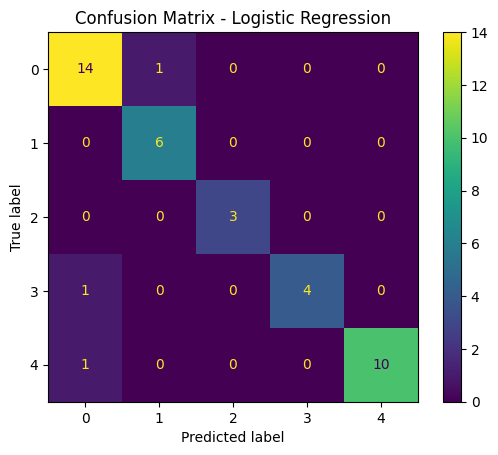

In [ ]:
# ======================
# Логистическая регрессия
# ======================
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_log))

cm_log = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(cm_log).plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [ ]:
# create numpy array for future K value
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [ ]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

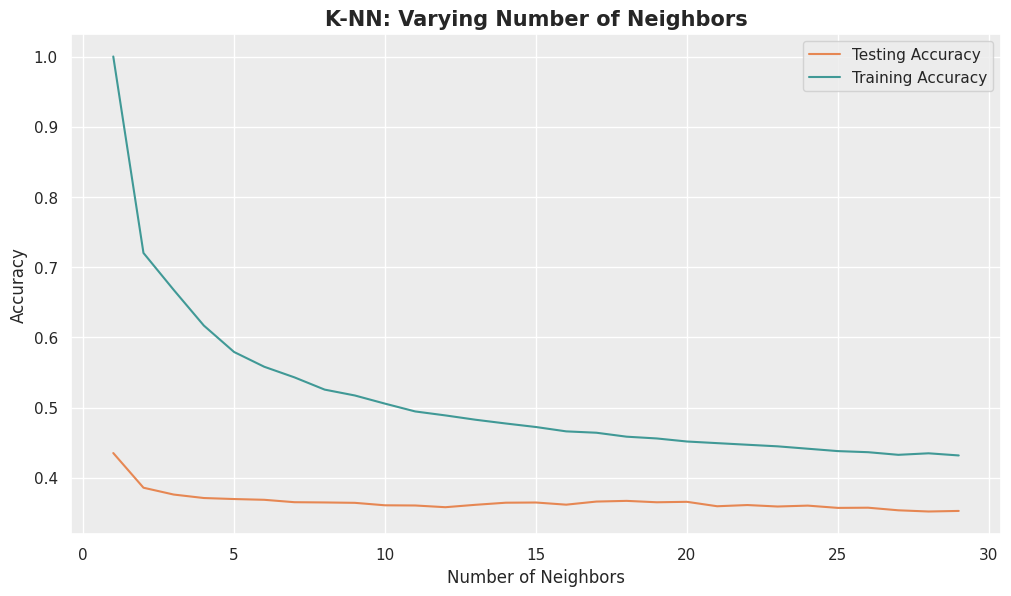

In [ ]:
# Generate plot
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of all plots
plt.figure(figsize=(12,6.5))
plt.title(label='K-NN: Varying Number of Neighbors', fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy', color='#E68753')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy', color = '#409996')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


K-ближайших соседей (k=5)

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      0.91      0.95        11

    accuracy                           0.95        40
   macro avg       0.98      0.95      0.96        40
weighted avg       0.96      0.95      0.95        40



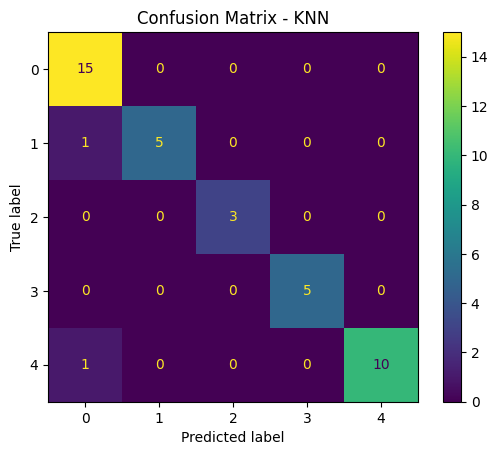

In [ ]:
# ======================
# K-ближайших соседей (KNN)
# ======================
print("\nK-ближайших соседей (k=5)")
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(cm_knn).plot()
plt.title("Confusion Matrix - KNN")
plt.show()


Точность Logistic Regression: 0.93
Точность KNN: 0.95


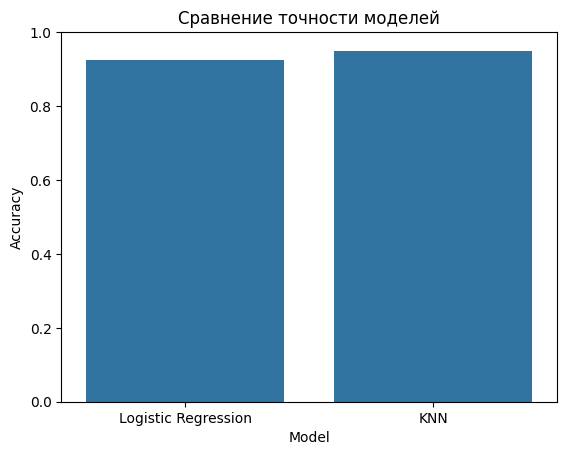

In [ ]:
# ======================
# Сравнение моделей по точности
# ======================
from sklearn.metrics import accuracy_score

acc_log = accuracy_score(y_test, y_pred_log)
acc_knn = accuracy_score(y_test, y_pred_knn)

print(f"\nТочность Logistic Regression: {acc_log:.2f}")
print(f"Точность KNN: {acc_knn:.2f}")

# График сравнения
model_scores = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN'],
    'Accuracy': [acc_log, acc_knn]
})
sns.barplot(x='Model', y='Accuracy', data=model_scores)
plt.ylim(0, 1.0)
plt.title('Сравнение точности моделей')
plt.show()

# Cтратегии обучения и оценки модели классификации в условиях несбалансированности классов

# Почему 94% точности может быть плохо? 🤔

In [ ]:
df = pd.read_csv('/content/fraud_detection.csv')
df

,transaction_id,amount,merchant_type,device_type,label
0,1,46.93,travel,tablet,0
1,2,301.01,groceries,desktop,0
2,3,131.67,others,tablet,0
3,4,91.29,electronics,desktop,0
4,5,16.96,others,mobile,0
...,...,...,...,...,...
995,996,9.61,clothing,tablet,0
996,997,249.27,travel,mobile,0
997,998,14.71,others,mobile,0
998,999,300.05,travel,tablet,0


In [ ]:
df.info()

df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  1000 non-null   int64  
 1   amount          1000 non-null   float64
 2   merchant_type   1000 non-null   object 
 3   device_type     1000 non-null   object 
 4   label           1000 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


In [ ]:
enc = LabelEncoder()

features_cat = ['merchant_type', 'device_type']

for col in features_cat:
  df[col] = enc.fit_transform(df[col])

X = df.drop('label', axis=1)
y = df['label']

In [ ]:
# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       187
           1       0.00      0.00      0.00        13

    accuracy                           0.94       200
   macro avg       0.47      0.50      0.48       200
weighted avg       0.87      0.94      0.90       200



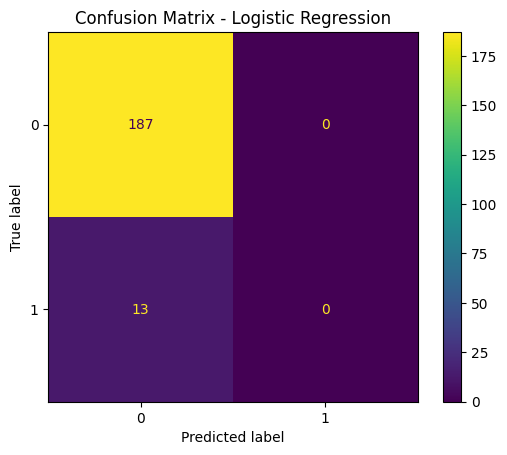

In [ ]:
# ======================
# Логистическая регрессия
# ======================
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_log))

cm_log = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(cm_log).plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [ ]:
print(f'Точность предсказаний модели {accuracy_score(y_test, y_pred_log)}')

0.935


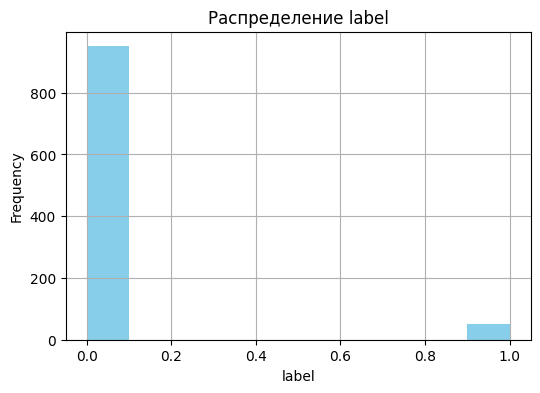

In [ ]:
# 4. Визуализация распределений
plt.figure(figsize=(6,4))
df['label'].hist(color='skyblue')
plt.title("Распределение label")
plt.xlabel("label")
plt.ylabel("Frequency")
plt.show()

## Арсенал против дисбаланса классов

### 🧪 Undersampling: уменьшение числа объектов большинства

📌 Когда использовать:

- Много данных

- Критична скорость обучения

- Готов пожертвовать частью информации большинства

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

model_rus = LogisticRegression(max_iter=1000)
model_rus.fit(X_rus, y_rus)
print("=== Undersampling ===")
print(classification_report(y_test, model_rus.predict(X_test)))


=== Undersampling ===
              precision    recall  f1-score   support

           0       0.93      0.42      0.58       187
           1       0.06      0.54      0.11        13

    accuracy                           0.42       200
   macro avg       0.49      0.48      0.34       200
weighted avg       0.87      0.42      0.55       200



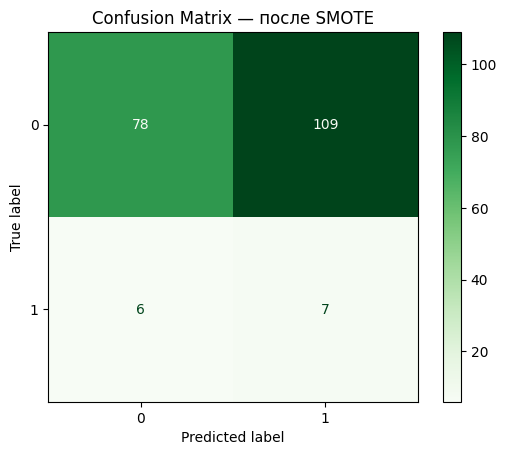

In [ ]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model_rus, X_test, y_test, cmap='Greens')
plt.title("Confusion Matrix — после Undersampling")
plt.show()

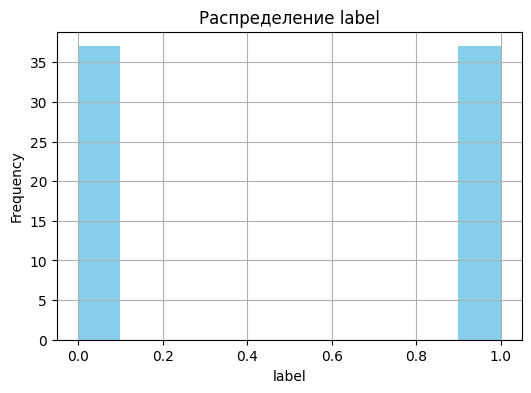

In [ ]:
# 4. Визуализация распределений
plt.figure(figsize=(6,4))
y_rus.hist(color='skyblue')
plt.title("Распределение label")
plt.xlabel("label")
plt.ylabel("Frequency")
plt.show()

## 🔬 Oversampling: дублирование/генерация меньшинства
📌 Когда использовать:

- Мало данных

- Миноритарный класс важен

- Готов мириться с возможным переобучением

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

model_ros = LogisticRegression(max_iter=1000)
model_ros.fit(X_ros, y_ros)
print("=== Oversampling ===")
print(classification_report(y_test, model_ros.predict(X_test)))


=== Oversampling ===
              precision    recall  f1-score   support

           0       0.94      0.57      0.71       187
           1       0.07      0.46      0.12        13

    accuracy                           0.56       200
   macro avg       0.50      0.51      0.41       200
weighted avg       0.88      0.56      0.67       200



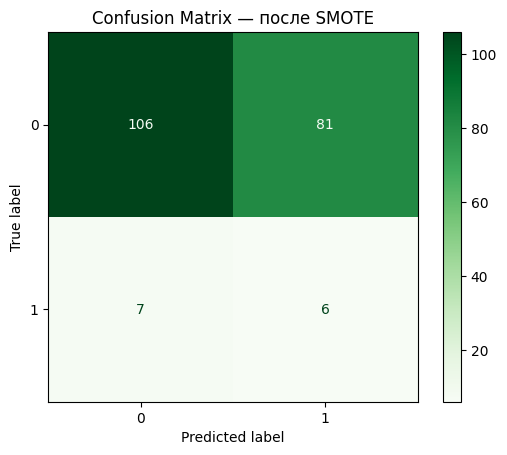

In [ ]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model_ros, X_test, y_test, cmap='Greens')
plt.title("Confusion Matrix — после Oversampling")
plt.show()

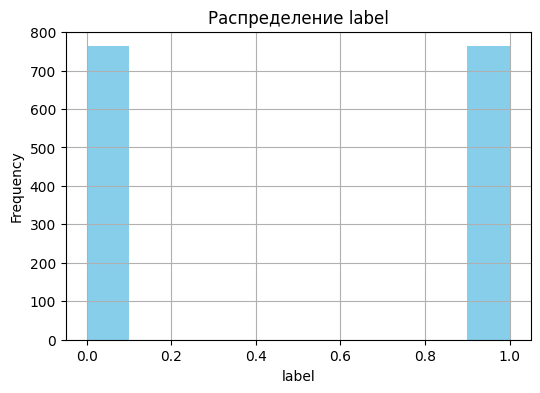

In [ ]:
# 4. Визуализация распределений
plt.figure(figsize=(6,4))
y_ros.hist(color='skyblue')
plt.title("Распределение label")
plt.xlabel("label")
plt.ylabel("Frequency")
plt.show()

## 🧬 SMOTE / ADASYN: синтетические данные

📌 Когда использовать:

- Миноритарный класс крайне редок

- Простое дублирование не помогает

- Хотим новые точки, а не копии

In [ ]:
# 4. Балансировка SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

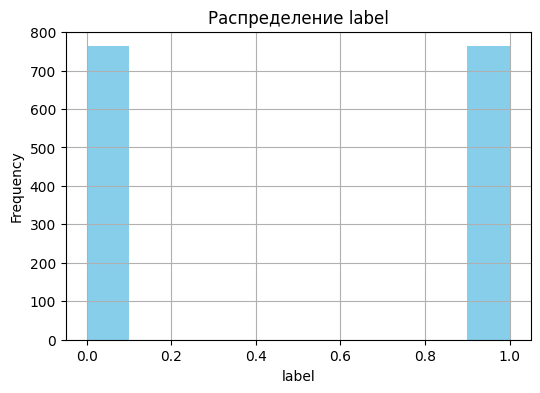

In [ ]:
# 4. Визуализация распределений
plt.figure(figsize=(6,4))
y_train_res.hist(color='skyblue')
plt.title("Распределение label")
plt.xlabel("label")
plt.ylabel("Frequency")
plt.show()

==== После SMOTE ====
              precision    recall  f1-score   support

           0       0.93      0.53      0.68       187
           1       0.06      0.46      0.11        13

    accuracy                           0.53       200
   macro avg       0.50      0.50      0.39       200
weighted avg       0.88      0.53      0.64       200



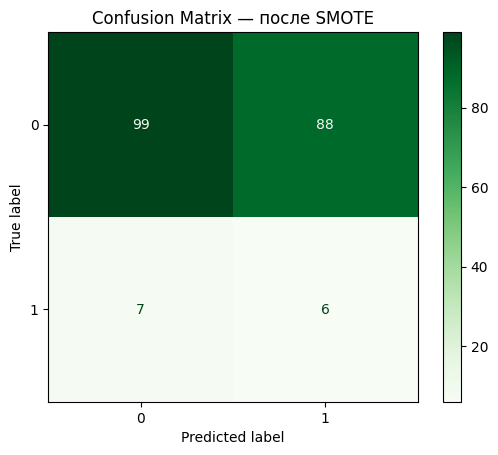

In [ ]:
# 5. Модель после SMOTE
smote_model = LogisticRegression()
smote_model.fit(X_train_res, y_train_res)
y_pred_smote = smote_model.predict(X_test)

print("==== После SMOTE ====")
print(classification_report(y_test, y_pred_smote))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(smote_model, X_test, y_test, cmap='Greens')
plt.title("Confusion Matrix — после SMOTE")
plt.show()

In [ ]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_ada, y_ada = adasyn.fit_resample(X_train, y_train)

model_ada = LogisticRegression(max_iter=1000)
model_ada.fit(X_ada, y_ada)
print("=== ADASYN ===")
print(classification_report(y_test, model_ada.predict(X_test)))

=== ADASYN ===
              precision    recall  f1-score   support

           0       0.95      0.56      0.70       187
           1       0.08      0.54      0.14        13

    accuracy                           0.56       200
   macro avg       0.51      0.55      0.42       200
weighted avg       0.89      0.56      0.66       200



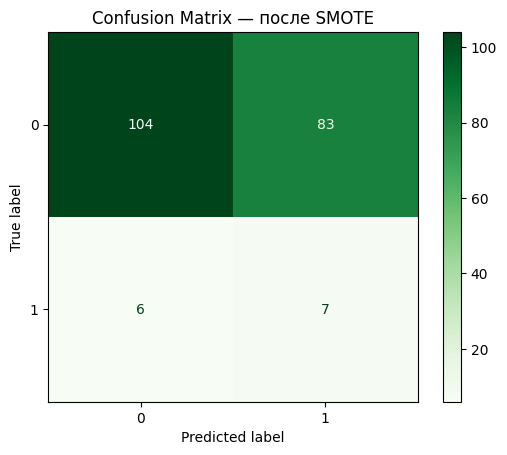

In [ ]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model_ada, X_test, y_test, cmap='Greens')
plt.title("Confusion Matrix — после ADASYN")
plt.show()

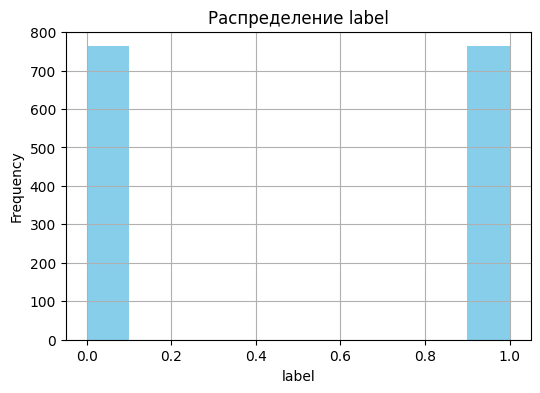

In [ ]:
# 4. Визуализация распределений
plt.figure(figsize=(6,4))
y_train_res.hist(color='skyblue')
plt.title("Распределение label")
plt.xlabel("label")
plt.ylabel("Frequency")
plt.show()

## ⚖️ Class Weights — Автоматическое усиление влияния меньшинства

📌 Когда использовать:

- Не хочешь менять данные

- Нужна простота

- Важна explainability



In [ ]:
model_weighted = LogisticRegression(class_weight='balanced', max_iter=1000)
model_weighted.fit(X_train, y_train)
print("=== Class Weights ===")
print(classification_report(y_test, model_weighted.predict(X_test)))

=== Class Weights ===
              precision    recall  f1-score   support

           0       0.95      0.56      0.70       187
           1       0.08      0.54      0.14        13

    accuracy                           0.56       200
   macro avg       0.51      0.55      0.42       200
weighted avg       0.89      0.56      0.67       200



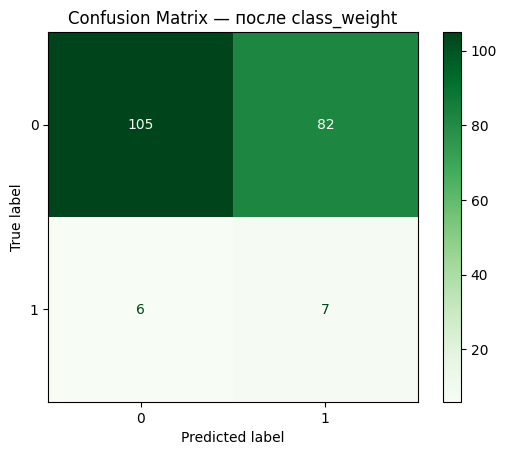

In [ ]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model_weighted, X_test, y_test, cmap='Greens')
plt.title("Confusion Matrix — после class_weight")
plt.show()

## ⚠️ Сценарий: "Ничего не помогает"
🧠 Значит, проблема не в балансе, а в…:

💀 Плохих признаках (мало информации о минорном классе)

🧊 Слишком большой разнице в распределениях классов

🧩 Сильной шумности (классы не разделимы линейно/мягко)

🧱 Отсутствии контекста в модели (временные/категориальные связи неучтены)

In [ ]:
# 🔁 Пайплайн: полиномиальные признаки → стандартизация → лог.регрессия
model = Pipeline([
    ('poly', PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)),
    ('logreg', LogisticRegression(max_iter=1000, class_weight='balanced'))  # balanced на всякий
])

# 🔍 Обучаем
model.fit(X_train, y_train)

# 🧾 Оценка
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.52      0.66       187
           1       0.05      0.38      0.09        13

    accuracy                           0.51       200
   macro avg       0.49      0.45      0.38       200
weighted avg       0.87      0.51      0.63       200



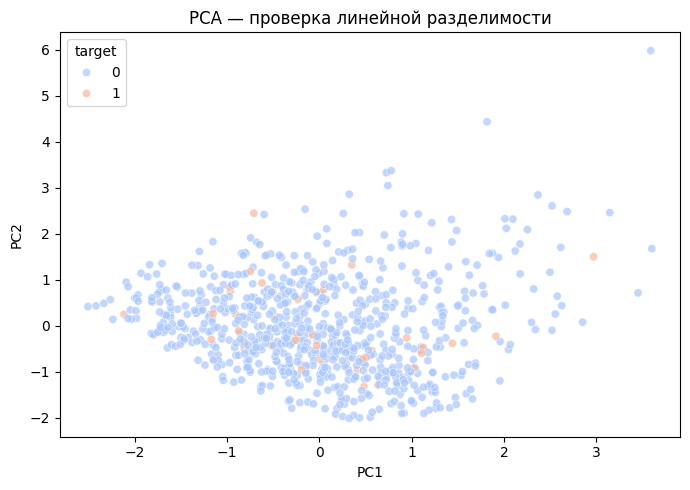

In [ ]:
# 🧩 Шумность — PCA Principal Component Analysis
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y_train.values

plt.figure(figsize=(7, 5))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target', alpha=0.7, palette='coolwarm')
plt.title("PCA — проверка линейной разделимости")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

y_pred_tree = model.predict(X_test)

In [ ]:
print("=== Class Weights ===")
print(classification_report(y_test, model.predict(X_test)))

=== Class Weights ===
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       187
           1       0.00      0.00      0.00        13

    accuracy                           0.94       200
   macro avg       0.47      0.50      0.48       200
weighted avg       0.87      0.94      0.90       200



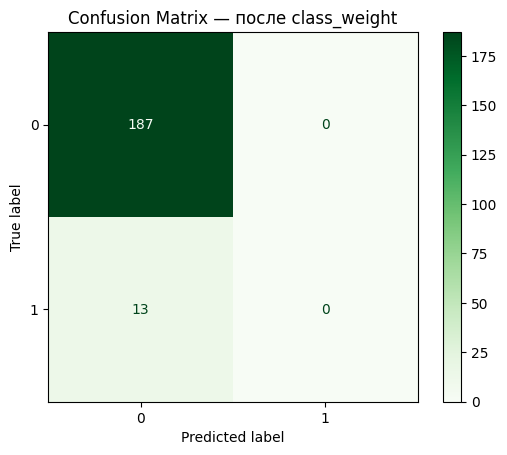

In [ ]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Greens')
plt.title("Confusion Matrix — после class_weight")
plt.show()